 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns = Path("D:/PandasHW/04-Pandas/Starter_Code/Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [39]:
# Reading algorithmic returns
algo_returns = Path("D:/PandasHW/04-Pandas/Starter_Code/Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [40]:
# Count nulls
algo_returns.isnull()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [41]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [43]:
# Reading S&P 500 Closing Prices
sp500_returns = Path("D:/PandasHW/04-Pandas/Starter_Code/Resources/sp500_history.csv")
sp500_returns = pd.read_csv(sp500_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_returns.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [44]:
# Check Data Types
sp500_returns.dtypes

Close    object
dtype: object

In [1]:
# Fix Data Types
sp500_returns["Close"] = sp500_returns['Close'].replace("$", "")
sp500_returns["Close"] = sp500_returns['Close'].replace(",", "")
sp500_returns["Close"] = sp500_returns['Close'].astype("float")
sp500_returns.head()

NameError: name 'sp500_returns' is not defined

In [46]:
# Calculate Daily Returns
sp500_returns = sp500_returns.pct_change()
sp500_returns.head()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [14]:
# Drop nulls
sp500_returns = sp500_returns.dropna().copy()
sp500_returns.head()

,Close
Date,
2019-04-18,-0.884637
2019-04-17,0.559400
2019-04-16,-2.445510
2019-04-15,-1.223394
2019-04-12,-2.237116


In [31]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename(columns = {"Close": "sp500 price"})
sp500_returns.head()

,sp500 price
Date,
2019-04-18,-0.884637
2019-04-17,0.559400
2019-04-16,-2.445510
2019-04-15,-1.223394
2019-04-12,-2.237116


## Combine Whale, Algorithmic, and S&P 500 Returns

In [34]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_all = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")
portfolio_all.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 price
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-4.689667
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-1.083090
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,-4.659421
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-1.227713
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,7.980195


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

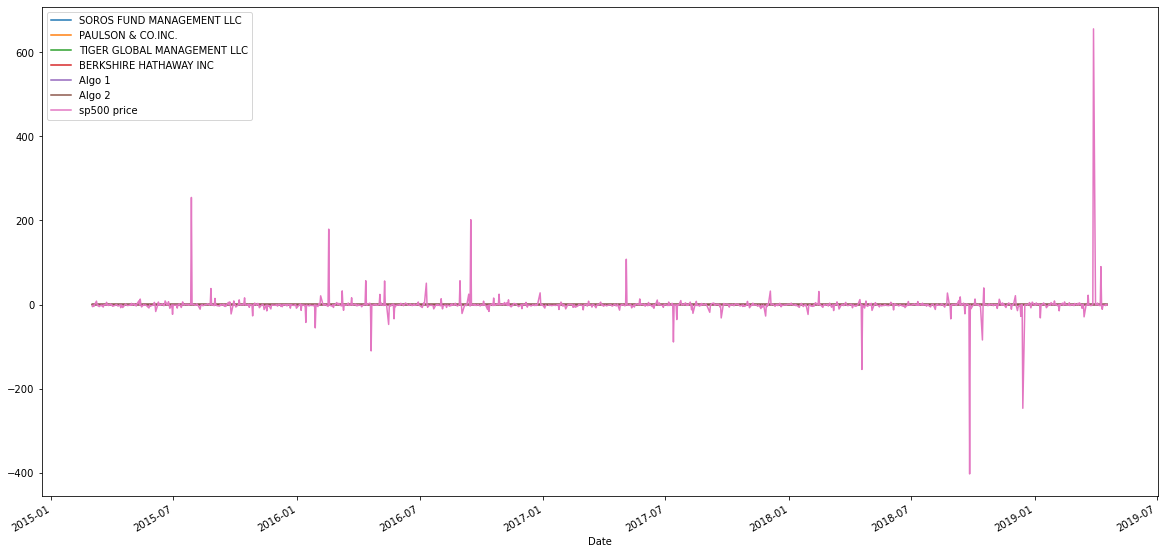

In [35]:
# Plot daily returns of all portfolios
portfolio_all.plot(figsize=(20, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

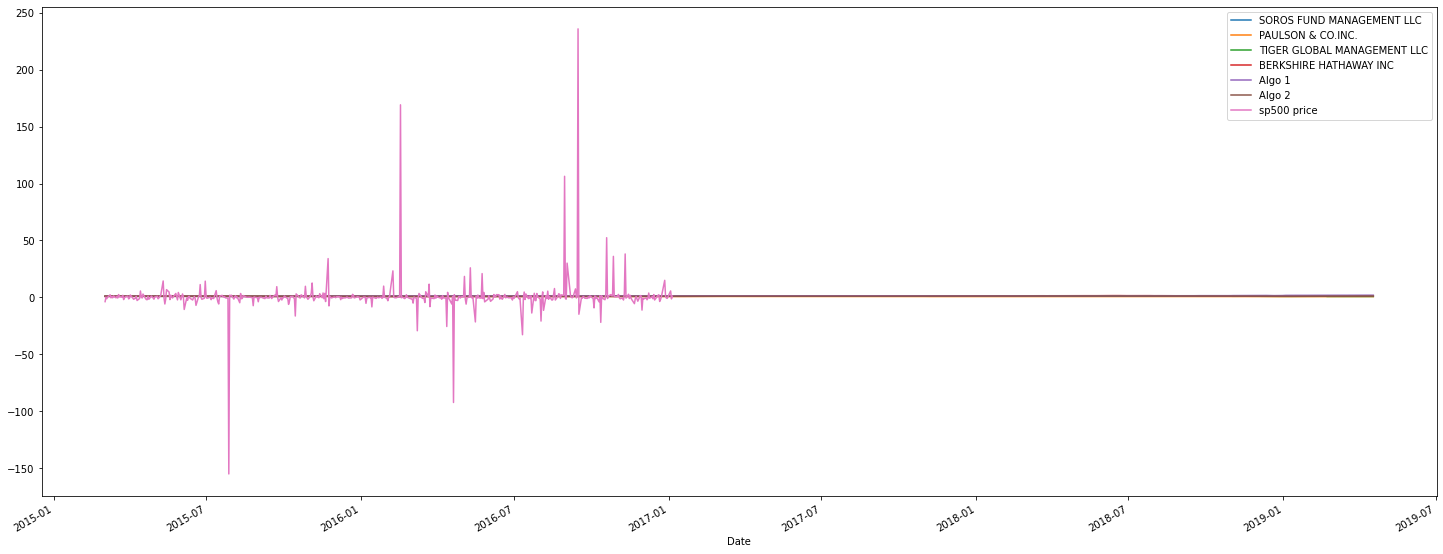

In [36]:
# Calculate cumulative returns of all portfolios
cum_return = (1 + portfolio_all).cumprod()
# Plot cumulative returns
cum_return.plot(figsize = (25,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

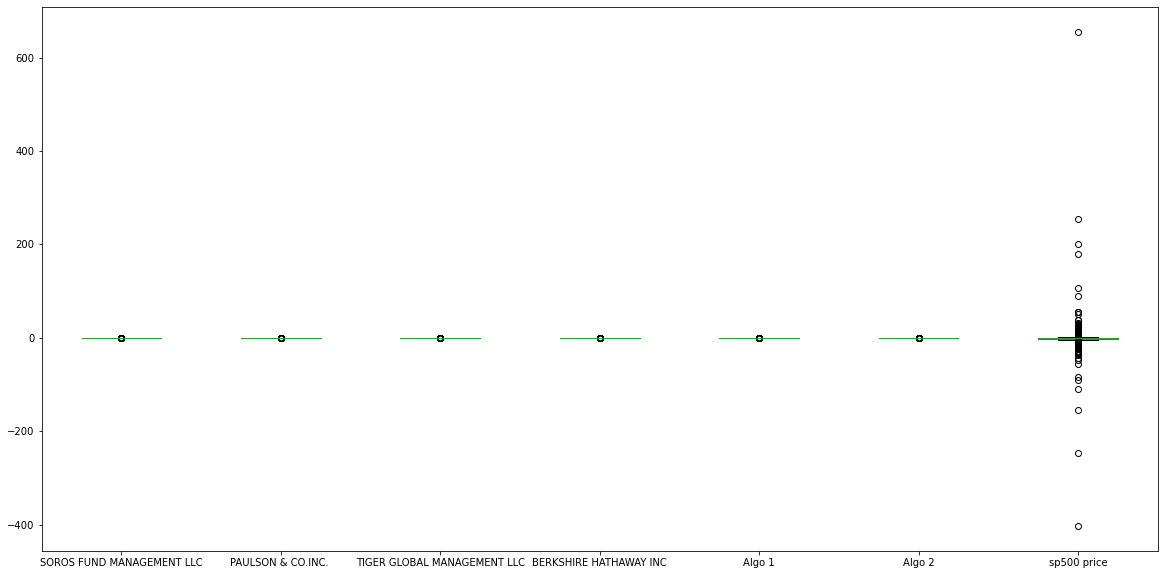

In [37]:
# Box plot to visually show risk
portfolio_all.plot(kind = 'box', figsize = (20,10))

### Calculate Standard Deviations

In [38]:
# Calculate the daily standard deviations of all portfolios
portfolio_all.std()

SOROS FUND MANAGEMENT LLC      0.007900
PAULSON & CO.INC.              0.007025
TIGER GLOBAL MANAGEMENT LLC    0.010902
BERKSHIRE HATHAWAY INC         0.012925
Algo 1                         0.007626
Algo 2                         0.008345
sp500 price                         NaN
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [24]:
# Calculate  the daily standard deviation of S&P 500
sp500_sd = portfolio_all["sp500 price"].std()
# Determine which portfolios are riskier than the S&P 500
portfolio_all.std() > sp500_sd

TypeError: could not convert string to float: '$2107.78'

### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)
annual_sd = portfolio_all.std() * np.sqrt(252)
annual_sd.head()
                                    

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

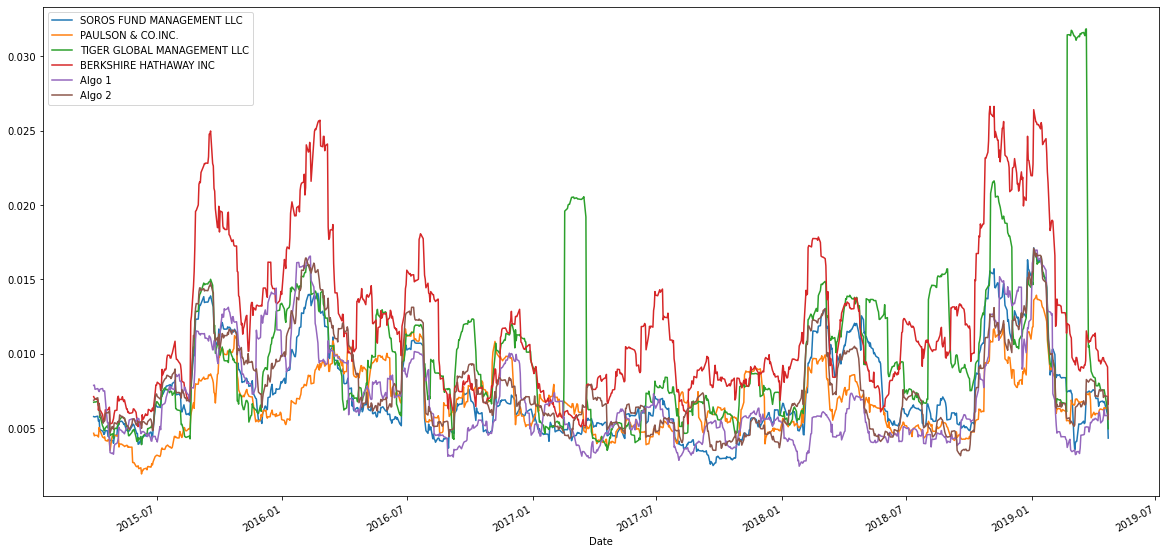

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolio_all_roll = portfolio_all.rolling(window=21).std()
# Plot the rolling standard deviation
portfolio_all_roll.plot(figsize=(20,10))

### Calculate and plot the correlation

In [27]:
# Calculate the correlation
corr_df = portfolio_all.corr()
# Display de correlation matrix
corr_df.style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [28]:
# Calculate covariance of a single portfolio
covariance = portfolio_all["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(portfolio_all["sp500 price"])
# Calculate variance of S&P 500
variance = portfolio_all["sp500 price"].rolling(60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(20, 10))

TypeError: unsupported operand type(s) for +: 'float' and 'str'

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

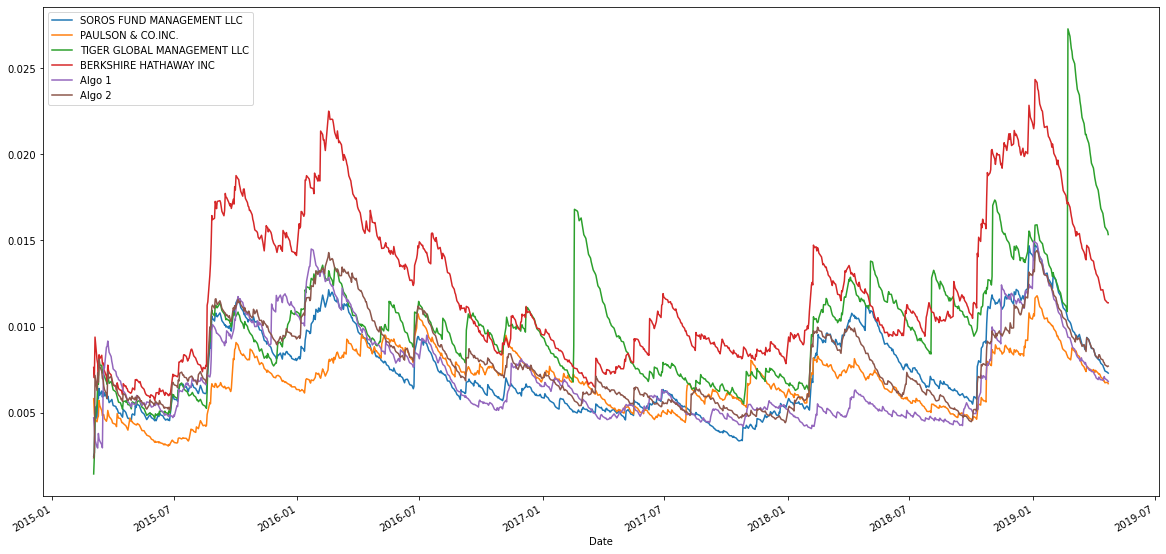

In [29]:
# Use `ewm` to calculate the rolling window
portfolio_all.ewm(halflife=21).std().plot(figsize=(20, 10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios
sharperatio = (portfolio_all.mean() * 252) / (portfolio_all.std() * np.sqrt(252))
sharperatio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
dtype: float64

<AxesSubplot:>

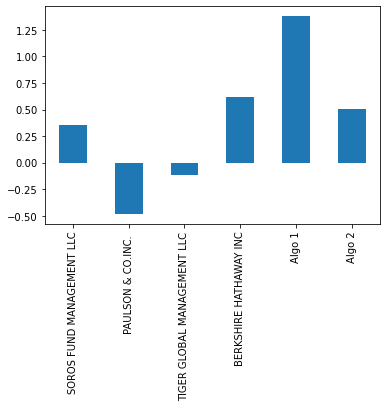

In [31]:
# Visualize the sharpe ratios as a bar plot
sharperatio.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

yes, algorithmic strategies outperform sp500 & and whale portfolios

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [32]:
# Reading data from 1st stock
google = Path("D:/PandasHW/04-Pandas/Starter_Code/Resources/goog_historical.csv")
google = pd.read_csv(google, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
google = google.sort_index()
google.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [33]:
# Reading data from 2nd stock
apple = Path("D:/PandasHW/04-Pandas/Starter_Code/Resources/aapl_historical.csv")
apple = pd.read_csv(apple, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
apple = apple.sort_index()
apple.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [34]:
# Reading data from 3rd stock
costco = Path("D:/PandasHW/04-Pandas/Starter_Code/Resources/cost_historical.csv")
costco = pd.read_csv(costco, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
costco = costco.sort_index()
costco.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [35]:
# Combine all stocks in a single DataFrame
stocks_all = pd.concat([google, apple, costco], axis="rows", join="inner")
stocks_all.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [36]:
# Reset Date index
stocks_all = stocks_all.reset_index()
stocks_all.head()

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59


In [37]:
# Reorganize portfolio data by having a column per symbol
main_portfolio = stocks_all.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
main_portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [38]:
# Calculate daily returns
dailyreturns = main_portfolio.pct_change()
# Drop NAs
dailyreturns = dailyreturns.dropna().copy()
# Display sample data
dailyreturns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = dailyreturns.dot(weights)
# Display sample data
portfolio_return.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [40]:
# Join your returns DataFrame to the original returns DataFrame
all_folio = pd.concat([portfolio_all, portfolio_return], axis = "columns", join = "inner")
all_folio.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 price,0
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,$2907.06,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,$2900.45,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,$2905.03,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,$2907.97,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,$2933.68,0.011959


In [41]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_folio = all_folio.dropna().copy()
all_folio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 price,0
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,$2730.13,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,$2711.45,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,$2722.46,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,$2720.13,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,$2712.97,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,$2907.06,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,$2900.45,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,$2905.03,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,$2907.97,0.001217


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [42]:
# Calculate the annualized `std`
SD = all_folio.std() * np.sqrt(252)
SD

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
0                              0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

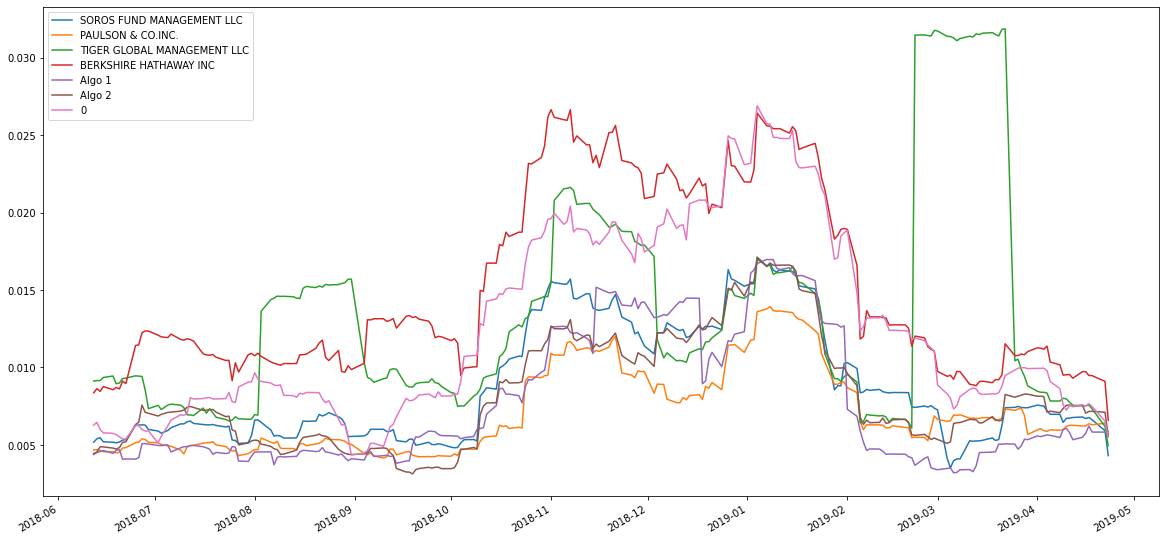

In [43]:
# Calculate rolling standard deviation
rolling_SD = all_folio.rolling(window=21).std()
# Plot rolling standard deviation
rolling_SD.plot(figsize=(20, 10))

### Calculate and plot the correlation

In [44]:
# Calculate and plot the correlation
correlation = all_folio.corr()
correlation.style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,0
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.739936
0,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [45]:
# Calculate and plot Beta
covariance = all_folio["0"].rolling(window=60).cov(all_folio["sp500 price"])
variance = all_folio["sp500 price"].rolling(60).var()
beta = covariance / variance
beta.plot(figsize=(20, 10))

KeyError: '0'

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [46]:
# Calculate Annualzied Sharpe Ratios
ratio_sharpe = (all_folio.mean() * 252) / (all_folio.std()) * np.sqrt(252)

<AxesSubplot:>

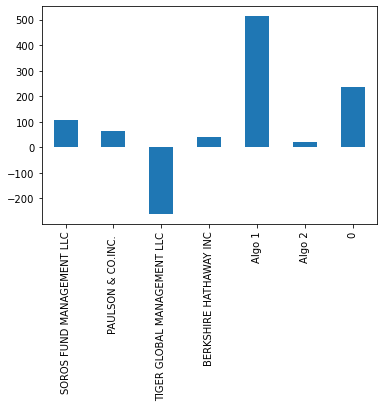

In [47]:
# Visualize the sharpe ratios as a bar plot
ratio_sharpe.plot(kind="bar")

### How does your portfolio do?

Write your answer here!